In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
datafile = pd.DataFrame()
datafile[0] = [1,2,3,4,5,6,7]
datafile[1] = [67,89,73,97,85,84,79]
datafile.columns =["Course","Marks"]
print(datafile)

   Course  Marks
0       1     67
1       2     89
2       3     73
3       4     97
4       5     85
5       6     84
6       7     79


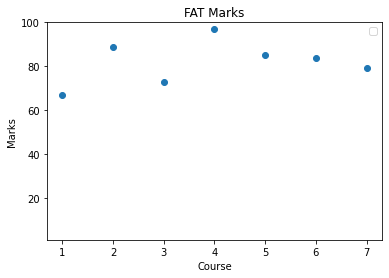

In [ ]:
plt.scatter(datafile['Course'],datafile['Marks'])
plt.title("FAT Marks")

plt.ylim(1,100)
plt.legend()
plt.xlabel("Course")
plt.ylabel("Marks")
plt.show()

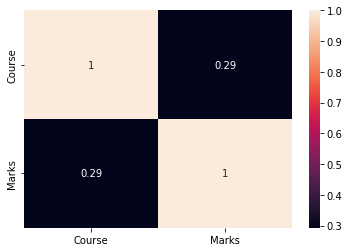

In [ ]:
import seaborn as sb
data_corr = datafile.corr()
sb.heatmap(data_corr,annot=True)

In [ ]:
from sklearn import linear_model
regress = linear_model.LinearRegression()

train_x = np.asanyarray(datafile[['Course']])
train_y = np.asanyarray(datafile[['Marks']])
#print(train_x)
#print(train_y)

regress.fit(train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)


Coefficients:  [[1.35714286]]
Intercept:  [76.57142857]


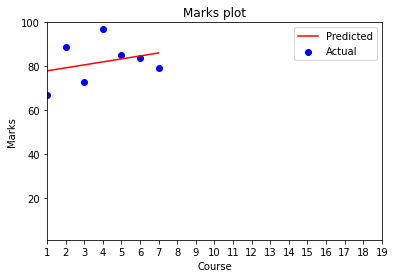

In [ ]:
plt.scatter(datafile.Course, datafile.Marks,  color='blue',label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.title("Marks plot")
plt.xlim(1,10)
plt.ylim(1,100)
plt.xticks(np.arange(1,20,1))
plt.legend()
plt.xlabel("Course")
plt.ylabel("Marks")
plt.show()

In [ ]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
datafile['Predicted'] = y_predicted
print(y_predicted)
print(datafile.head())

[67] [77.92857143]
[89] [79.28571429]
[73] [80.64285714]
[97] [82.]
[85] [83.35714286]
[84] [84.71428571]
[79] [86.07142857]
[[77.92857143]
 [79.28571429]
 [80.64285714]
 [82.        ]
 [83.35714286]
 [84.71428571]
 [86.07142857]]
   Course  Marks  Predicted
0       1     67  77.928571
1       2     89  79.285714
2       3     73  80.642857
3       4     97  82.000000
4       5     85  83.357143


           Performance measurement

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error: 7.530612244897958
Mean Squared Error: 78.63265306122447
Root Mean Squared Error: 8.867505458764853


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(datafile[['Course']])
test_y = np.asanyarray(datafile[['Marks']])
test_y_predicted = regress.predict(test_x)

print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE): " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y, test_y_predicted) )

Mean absolute error (MAE): 7.530612244897958
Mean square error (MSE):  78.63265306122447
R2-score: %.2f (RMSE): 0.08566682486948285


        Using training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(datafile[['Course']], datafile[['Marks']], test_size=0.30, random_state=42)
print(train_x)
print("Testing")
print(test_x)

from sklearn import linear_model
regress = linear_model.LinearRegression()
regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

   Course
2       3
4       5
3       4
6       7
Testing
   Course
0       1
1       2
5       6
Coefficients:  [[-0.17142857]]
Intercept:  [84.31428571]


In [ ]:
y_predicted = regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)

   Course
0       1
1       2
5       6
   Marks
0     67
1     89
5     84
[[84.14285714]
 [83.97142857]
 [83.28571429]]


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_predicted)))

Mean Absolute Error: 7.628571428571429
Mean Squared Error: 106.55809523809518
Root Mean Squared Error: 10.32269806000811


In [ ]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(regress, datafile[['Course']], datafile[['Marks']], cv = 3,scoring='r2')
print(accuracy)

[-10.35534794  -4.05938668 -44.008     ]


In [ ]:
import sklearn
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei